In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Objetivo:
Se han hecho llamadas de mk para contactar con el clientes y determinar si seria suscrito al deposito bancario.

Datos de interés:
age: edad
job: trabajo
marital: estado civil
education: nivel educativo
default: impagos en historial
contact: metodo contacto
campaign: numero de contactos para el cliente en campaña
y: suscrito al producto o no VARIABLE CLAVE.
id para concat con ID

Income: ingresos. Creo que no cambia mucho
ID para concat con id_
Dt_Customer: fecha conversion a cliente.


In [ ]:
csv_path = "../data/bank-additional.csv"


df_bank_additional = pd.read_csv(csv_path, index_col=0)

print(df_bank_additional.shape)
print(df_bank_additional.columns)
print(df_bank_additional.dtypes)
print(df_bank_additional.head())
print(df_bank_additional.describe(include='all'))


(43000, 23)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object
    age        job  marital    education  default  housing  loan 

In [109]:
df_bank_aditional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'campaign',
       'y', 'id_'],
      dtype='object')

In [110]:
df_bank_aditional = df_bank_aditional[['age', 'job', 'marital', 'education', 'default','contact', 'campaign', 'y', 'id_']]
df_bank_aditional.head()

,age,job,marital,education,default,contact,campaign,y,id_
0,38.0,housemaid,MARRIED,basic.4y,0.0,telephone,1,no,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,-1.0,telephone,1,no,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,telephone,1,no,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,telephone,1,no,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,telephone,1,no,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [111]:
#Nulos bank-additional
round(df_bank_aditional.isna().sum() / df_bank_aditional.shape[0] * 100, 2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
contact      0.0
campaign     0.0
y            0.0
id_          0.0
dtype: float64

In [112]:
#Duplicados bank-additional
df_bank_aditional = df_bank_aditional.drop_duplicates()
df_bank_aditional.duplicated().sum()

np.int64(0)

In [113]:
#Transformacion-Limpieza bankadditional
df_bank_aditional['age'] = df_bank_aditional['age'].fillna(df_bank_aditional['age'].median()) 

for col in ['job', 'marital', 'education']:
    df_bank_aditional[col] = df_bank_aditional[col].fillna('unknown')

for col in ['default']:
    df_bank_aditional[col] = df_bank_aditional[col].fillna(-1) 

df_bank_aditional['id_'] = df_bank_aditional['id_'].astype(str)

In [ ]:
excel_path = "../data/customer-details.xlsx"


df_customer_details = pd.read_excel(excel_path)
print(df_customer_details.shape)
print(df_customer_details.columns)
print(df_customer_details.dtypes)
print(df_customer_details.head())
print(df_customer_details.describe(include='all'))


(20115, 7)
Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Unnamed: 0                    int64
Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
ID                           object
dtype: object
   Unnamed: 0  Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0           0  161770        1         0  2012-04-04                 29   
1           1   85477        1         1  2012-12-30                  7   
2           2  147233        1         1  2012-02-02                  5   
3           3  121393        1         2  2012-12-21                 29   
4           4   63164        1         2  2012-06-20                 20   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-494

In [115]:
df_customer_details.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')

In [116]:
df_customer_details = df_customer_details[['Income', 'Dt_Customer', 'ID']]
df_customer_details.head()

,Income,Dt_Customer,ID
0,161770,2012-04-04,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,2012-12-30,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,2012-02-02,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,2012-12-21,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,2012-06-20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [117]:
#Nulos customer_details
round(df_customer_details.isna().sum() / df_customer_details.shape[0] * 100, 2)

Income         0.0
Dt_Customer    0.0
ID             0.0
dtype: float64

In [118]:
#Duplicados customer_details
df_customer_details = df_customer_details.drop_duplicates()
df_customer_details.duplicated().sum()

np.int64(0)

In [119]:
#Transformacion-Limpieza customer-details
df_customer_details['ID'] = df_customer_details['ID'].astype(str)

In [120]:
df_bank_aditional['id_'] = df_bank_aditional['id_'].astype(str)
df_bank_aditional = df_bank_aditional.drop_duplicates()

In [121]:
df_cruzado = df_bank_aditional.merge(df_customer_details, how= 'left', left_on='id_', right_on='ID')
df_cruzado = df_cruzado.drop(columns='ID')
df_cruzado.head()

,age,job,marital,education,default,contact,campaign,y,id_,Income,Dt_Customer
0,38.0,housemaid,MARRIED,basic.4y,0.0,telephone,1,no,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,2012-04-04
1,57.0,services,MARRIED,high.school,-1.0,telephone,1,no,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,2012-12-30
2,37.0,services,MARRIED,high.school,0.0,telephone,1,no,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,2012-02-02
3,40.0,admin.,MARRIED,basic.6y,0.0,telephone,1,no,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,2012-12-21
4,56.0,services,MARRIED,high.school,0.0,telephone,1,no,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,2012-06-20


In [122]:
df_cruzado.describe().T

,count,mean,min,25%,50%,75%,max,std
age,43000.0,39.741698,17.0,33.0,38.0,46.0,98.0,9.817735
default,43000.0,-0.208791,-1.0,0.0,0.0,0.0,1.0,0.406621
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
Income,20018.0,93071.656809,5852.0,49089.25,92973.5,136659.75,180791.0,50615.70116
Dt_Customer,20018,2012-07-01 14:49:46.032570880,2012-01-01 00:00:00,2012-03-31 00:00:00,2012-07-02 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,NaN


In [123]:
df_cruzado.isna().sum()

age                0
job                0
marital            0
education          0
default            0
contact            0
campaign           0
y                  0
id_                0
Income         22982
Dt_Customer    22982
dtype: int64

In [124]:
df_cruzado.select_dtypes('object').describe().T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,4,MARRIED,25999
education,43000,8,university.degree,12722
contact,43000,2,cellular,27396
y,43000,2,no,38156
id_,43000,43000,993bbbd6-4dbc-4a40-a408-f91f8462bee6,1


In [125]:
df_cruzado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          43000 non-null  float64       
 1   job          43000 non-null  object        
 2   marital      43000 non-null  object        
 3   education    43000 non-null  object        
 4   default      43000 non-null  float64       
 5   contact      43000 non-null  object        
 6   campaign     43000 non-null  int64         
 7   y            43000 non-null  object        
 8   id_          43000 non-null  object        
 9   Income       20018 non-null  float64       
 10  Dt_Customer  20018 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 3.6+ MB


In [126]:
round(df_cruzado['y'].value_counts() / df_cruzado.shape[0] * 100, 2)

y
no     88.73
yes    11.27
Name: count, dtype: float64

ANALISIS CATEGORICO:

job:
Student y retired tienen la mayor tasa de conversión. (pero con no mucha cantidad de valores)

marital:
Single convierten más que married y divorced.

education:
Iliterate es el valor que mayor conversion tiene pero con muy pocos casos. University.degree y professional.course es mas representativo en cantidad de conversion.

contact:
El contacto por cellular es claramente más efectivo que por telephone


C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\263453549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_job['yes'], y= tabla_job.index, palette='pastel')


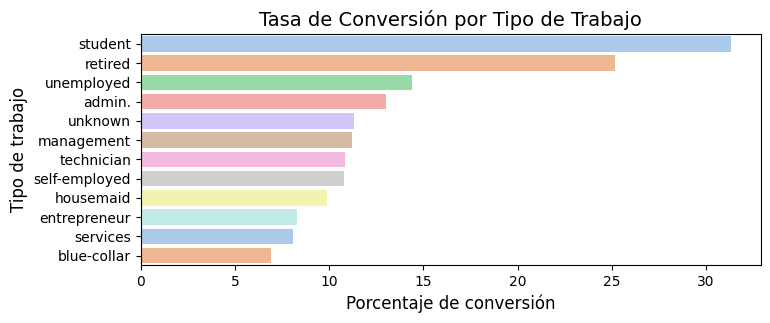

In [127]:
#VARIABLES CATEGORICAS
tabla_job = pd.crosstab(df_cruzado['job'], df_cruzado['y'], normalize='index') * 100
tabla_job = tabla_job.sort_values(by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_job['yes'], y= tabla_job.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de Trabajo", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de trabajo", fontsize=12)
plt.show()

In [128]:
tabla_job_conversion = pd.crosstab(df_cruzado['job'], df_cruzado['y'])
tabla_job_conversion['total'] = tabla_job_conversion.sum(axis=1)
tabla_job_conversion['conversion_rate'] = (tabla_job_conversion['yes'] / tabla_job_conversion['total']) * 100
tabla_job_conversion.sort_values(by='conversion_rate', ascending=False)


y,no,yes,total,conversion_rate
job,,,,
student,620,283,903,31.339978
retired,1339,451,1790,25.195531
unemployed,910,153,1063,14.393227
admin.,9458,1415,10873,13.013888
unknown,306,39,345,11.304348
management,2708,342,3050,11.213115
technician,6264,762,7026,10.845431
self-employed,1328,161,1489,10.812626
housemaid,1012,111,1123,9.884239


C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\755084711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_marital['yes'], y= tabla_marital.index, palette='pastel')


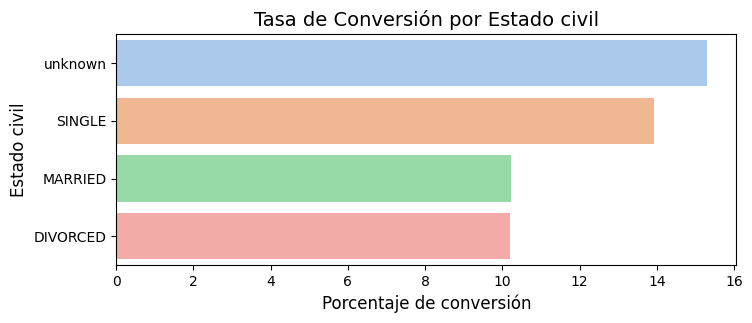

In [129]:
tabla_marital = pd.crosstab(df_cruzado['marital'], df_cruzado['y'], normalize='index') * 100
tabla_marital = tabla_marital.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_marital['yes'], y= tabla_marital.index, palette='pastel')

plt.title("Tasa de Conversión por Estado civil", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Estado civil", fontsize=12)
plt.show()

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\3713802417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_education['yes'], y= tabla_education.index, palette='pastel')


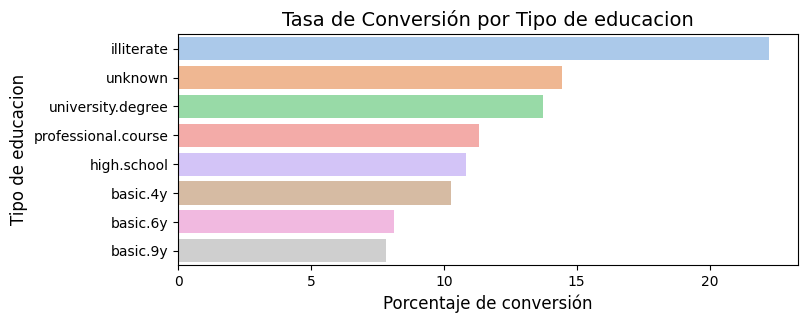

In [130]:
tabla_education = pd.crosstab(df_cruzado['education'], df_cruzado['y'], normalize='index') * 100
tabla_education = tabla_education.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_education['yes'], y= tabla_education.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de educacion", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de educacion", fontsize=12)
plt.show()

In [131]:
df_cruzado['education'].value_counts()

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\550255807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_contact['yes'], y= tabla_contact.index, palette='pastel')


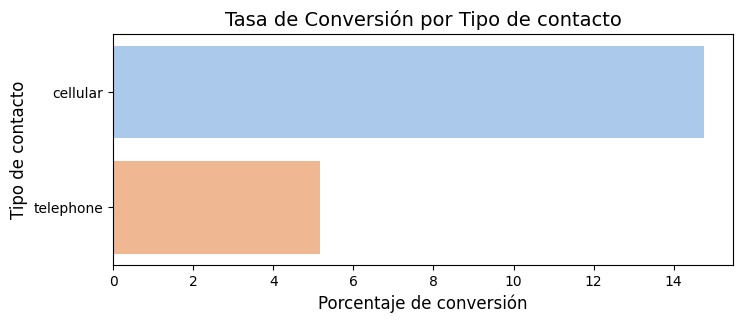

In [132]:
tabla_contact = pd.crosstab(df_cruzado['contact'], df_cruzado['y'], normalize='index') * 100
tabla_contact = tabla_contact.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_contact['yes'], y= tabla_contact.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de contacto", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de contacto", fontsize=12)
plt.show()

VARIABLES NUMERICAS:

campaign:
A mayor número de contactos, menor conversión.
Los clientes que dijeron "sí" fueron contactados menos veces.

age:
Mayor conversión en edades de 61 a 100 años.
Sin embargo el tramo de 31-45 años a pesar de tener una tasa de conversion baja, aporta una gran cantidad de clientes convertidos.

Income:
Tasa de conversión uniforme entre tramos. El Income no es relevante.

age vs Income:
No hay relación clara entre edad e ingreso.

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\3864158003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= tabla_tramos_edad['yes'], y= tabla_tramos_edad.index, palette= 'pastel')


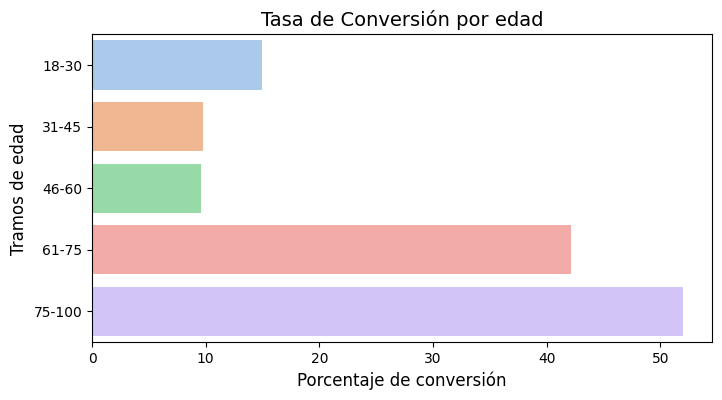

In [133]:
#Edad: '18-30', '31-45', '46-60', '61-75', '75+'
df_cruzado['tramos_edad'] = pd.cut(df_cruzado['age'], bins= [17, 30 , 45, 60 ,75, 100], labels= ['18-30', '31-45', '46-60', '61-75', '75-100'] )
tabla_tramos_edad = pd.crosstab(df_cruzado['tramos_edad'], df_cruzado['y'], normalize='index' )* 100
plt.figure(figsize=(8,4))
sns.barplot( x= tabla_tramos_edad['yes'], y= tabla_tramos_edad.index, palette= 'pastel')

plt.title("Tasa de Conversión por edad", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tramos de edad", fontsize=12)
plt.show()

In [134]:
df_cruzado['tramos_edad'].value_counts().sort_index()


tramos_edad
18-30      6866
31-45     25317
46-60      9966
61-75       615
75-100      231
Name: count, dtype: int64

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\3818830590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= tabla_tramos_income['yes'], y= tabla_tramos_income.index, palette= 'pastel')


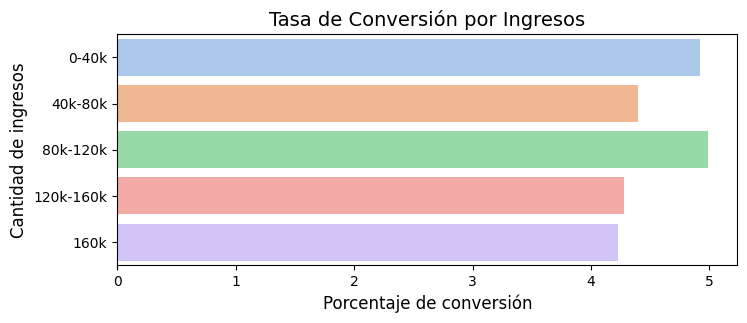

In [135]:
#Income: '0-40k', '40k-80k', '80k-120k', '120k-160k', '160k+'
df_cruzado['tramos_income'] = pd.cut(df_cruzado['Income'], bins= [0, 40000 , 80000, 120000 ,160000, df_cruzado['Income'].max()], labels= ['0-40k', '40k-80k', '80k-120k', '120k-160k', '160k'] )
tabla_tramos_income = pd.crosstab(df_cruzado['tramos_income'], df_cruzado['y'], normalize='index' ) * 100
plt.figure(figsize=(8,3))
sns.barplot( x= tabla_tramos_income['yes'], y= tabla_tramos_income.index, palette= 'pastel')

plt.title("Tasa de Conversión por Ingresos", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Cantidad de ingresos", fontsize=12)
plt.show()

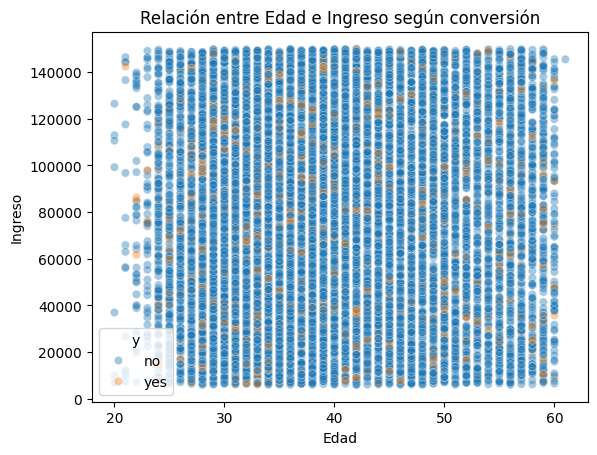

In [140]:
sns.scatterplot(data=df_cruzado[df_cruzado['Income'] < 150000], x='age', y='Income', hue='y', alpha=0.4)
plt.title("Relación entre Edad e Ingreso según conversión")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.show()


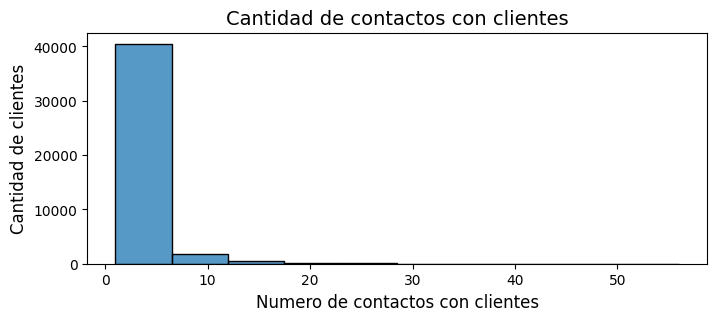

In [137]:
plt.figure(figsize=(8,3))
sns.histplot(df_cruzado['campaign'], bins=10)

plt.title("Cantidad de contactos con clientes", fontsize=14)
plt.xlabel("Numero de contactos con clientes", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.show()

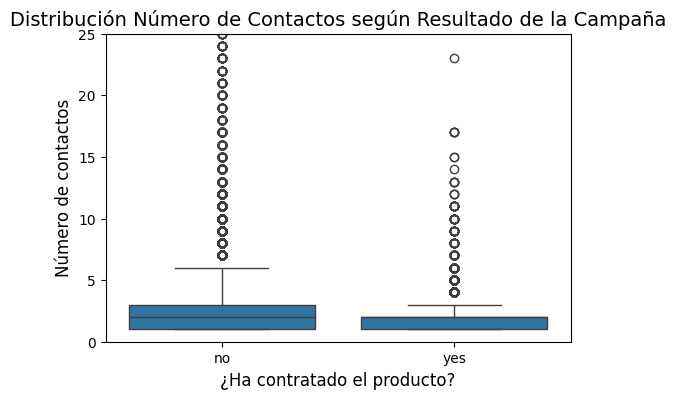

In [138]:
plt.figure(figsize=(6,4))
sns.boxplot(x= 'y', y= 'campaign', data= df_cruzado)
plt.ylim(0, 25)
plt.title("Distribución Número de Contactos según Resultado de la Campaña", fontsize=14)
plt.xlabel("¿Ha contratado el producto?", fontsize=12)
plt.ylabel("Número de contactos", fontsize=12)
plt.show()

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\2402835715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= conversiones_mes.values, y = conversiones_mes.index, palette='pastel')


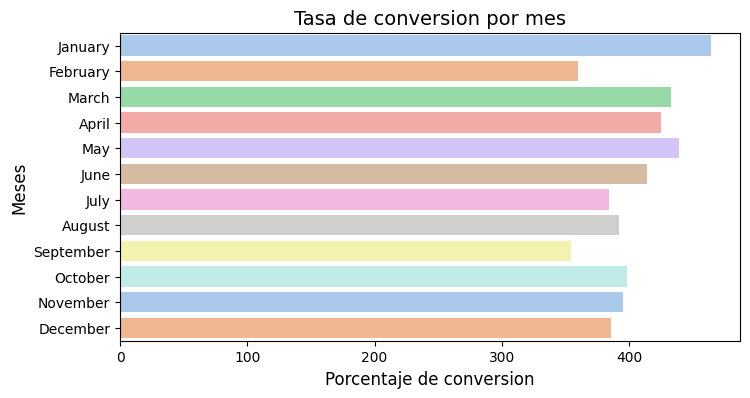

In [139]:
df_cruzado['mes_contacto'] = df_cruzado['Dt_Customer'].dt.month_name()
df_yes = df_cruzado[df_cruzado['y'] == 'yes']
conversiones_por_mes = pd.crosstab(df_cruzado['mes_contacto'], df_cruzado['y'], normalize='index') * 100
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

conversiones_mes = conversiones_mes.reindex(orden_meses)

plt.figure(figsize=(8,4))
sns.barplot(x= conversiones_mes.values, y = conversiones_mes.index, palette='pastel')
plt.title("Tasa de conversion por mes", fontsize=14)
plt.xlabel("Porcentaje de conversion", fontsize=12)
plt.ylabel("Meses", fontsize=12)
plt.show()


In [143]:
#Archivo procesado
df_cruzado.to_csv(
    r"C:\Users\ogsem\OneDrive\Desktop\MisCosas-20250219T134938Z-001\MisCosas\THEPOWER\PYTHON EDA\ProyectoEDA4\notebooks\df_cruzado.csv",index=False)
